<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/simplelinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficient (slope): 0.4193384939381271
Intercept: 0.4445972916907879
Test MSE: 0.7091
Test R²: 0.4589


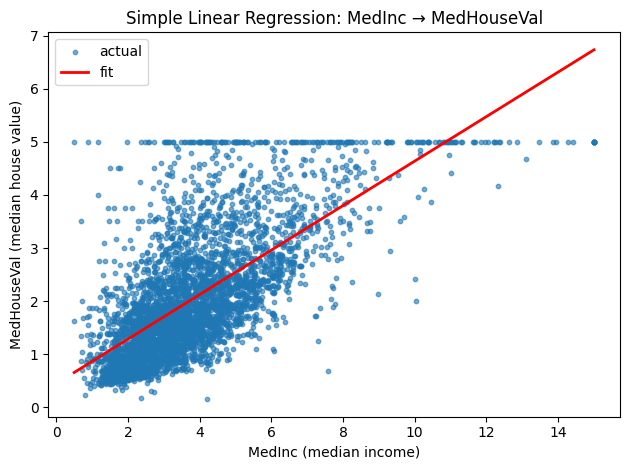

In [2]:
# exp3_simple_linreg.py
# Minimal Simple Linear Regression: MedInc -> MedHouseVal
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load data
data = fetch_california_housing(as_frame=True)
X = data.data[["MedInc"]].values      # single predictor as 2D array
y = data.target.values                 # target

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict & evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

# 5. Print essential results
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Test MSE:", round(mse, 4))
print("Test R²:", round(r2, 4))

# 6. Quick plot (scatter + regression line)
plt.scatter(X_test, y_test, s=10, alpha=0.6, label="actual")
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
plt.plot(x_line, model.predict(x_line), color="red", linewidth=2, label="fit")
plt.xlabel("MedInc (median income)")
plt.ylabel("MedHouseVal (median house value)")
plt.title("Simple Linear Regression: MedInc → MedHouseVal")
plt.legend()
plt.tight_layout()
plt.show()
